Modulation Type: QPSK, SNR: 2, Shape: (1000, 2, 128)
Modulation Type: PAM4, SNR: 8, Shape: (1000, 2, 128)
Modulation Type: AM-DSB, SNR: -4, Shape: (1000, 2, 128)
Modulation Type: GFSK, SNR: 6, Shape: (1000, 2, 128)
Modulation Type: QAM64, SNR: 8, Shape: (1000, 2, 128)
Modulation Type: AM-SSB, SNR: 12, Shape: (1000, 2, 128)
Modulation Type: 8PSK, SNR: 8, Shape: (1000, 2, 128)
Modulation Type: 8PSK, SNR: 12, Shape: (1000, 2, 128)
Modulation Type: QAM64, SNR: -6, Shape: (1000, 2, 128)
Modulation Type: QAM16, SNR: 2, Shape: (1000, 2, 128)
Modulation Type: QAM16, SNR: -20, Shape: (1000, 2, 128)
Modulation Type: PAM4, SNR: -6, Shape: (1000, 2, 128)
Modulation Type: WBFM, SNR: -18, Shape: (1000, 2, 128)
Modulation Type: AM-DSB, SNR: 16, Shape: (1000, 2, 128)
Modulation Type: CPFSK, SNR: 10, Shape: (1000, 2, 128)
Modulation Type: WBFM, SNR: 6, Shape: (1000, 2, 128)
Modulation Type: BPSK, SNR: 4, Shape: (1000, 2, 128)
Modulation Type: BPSK, SNR: -2, Shape: (1000, 2, 128)
Modulation Type: QPSK, 

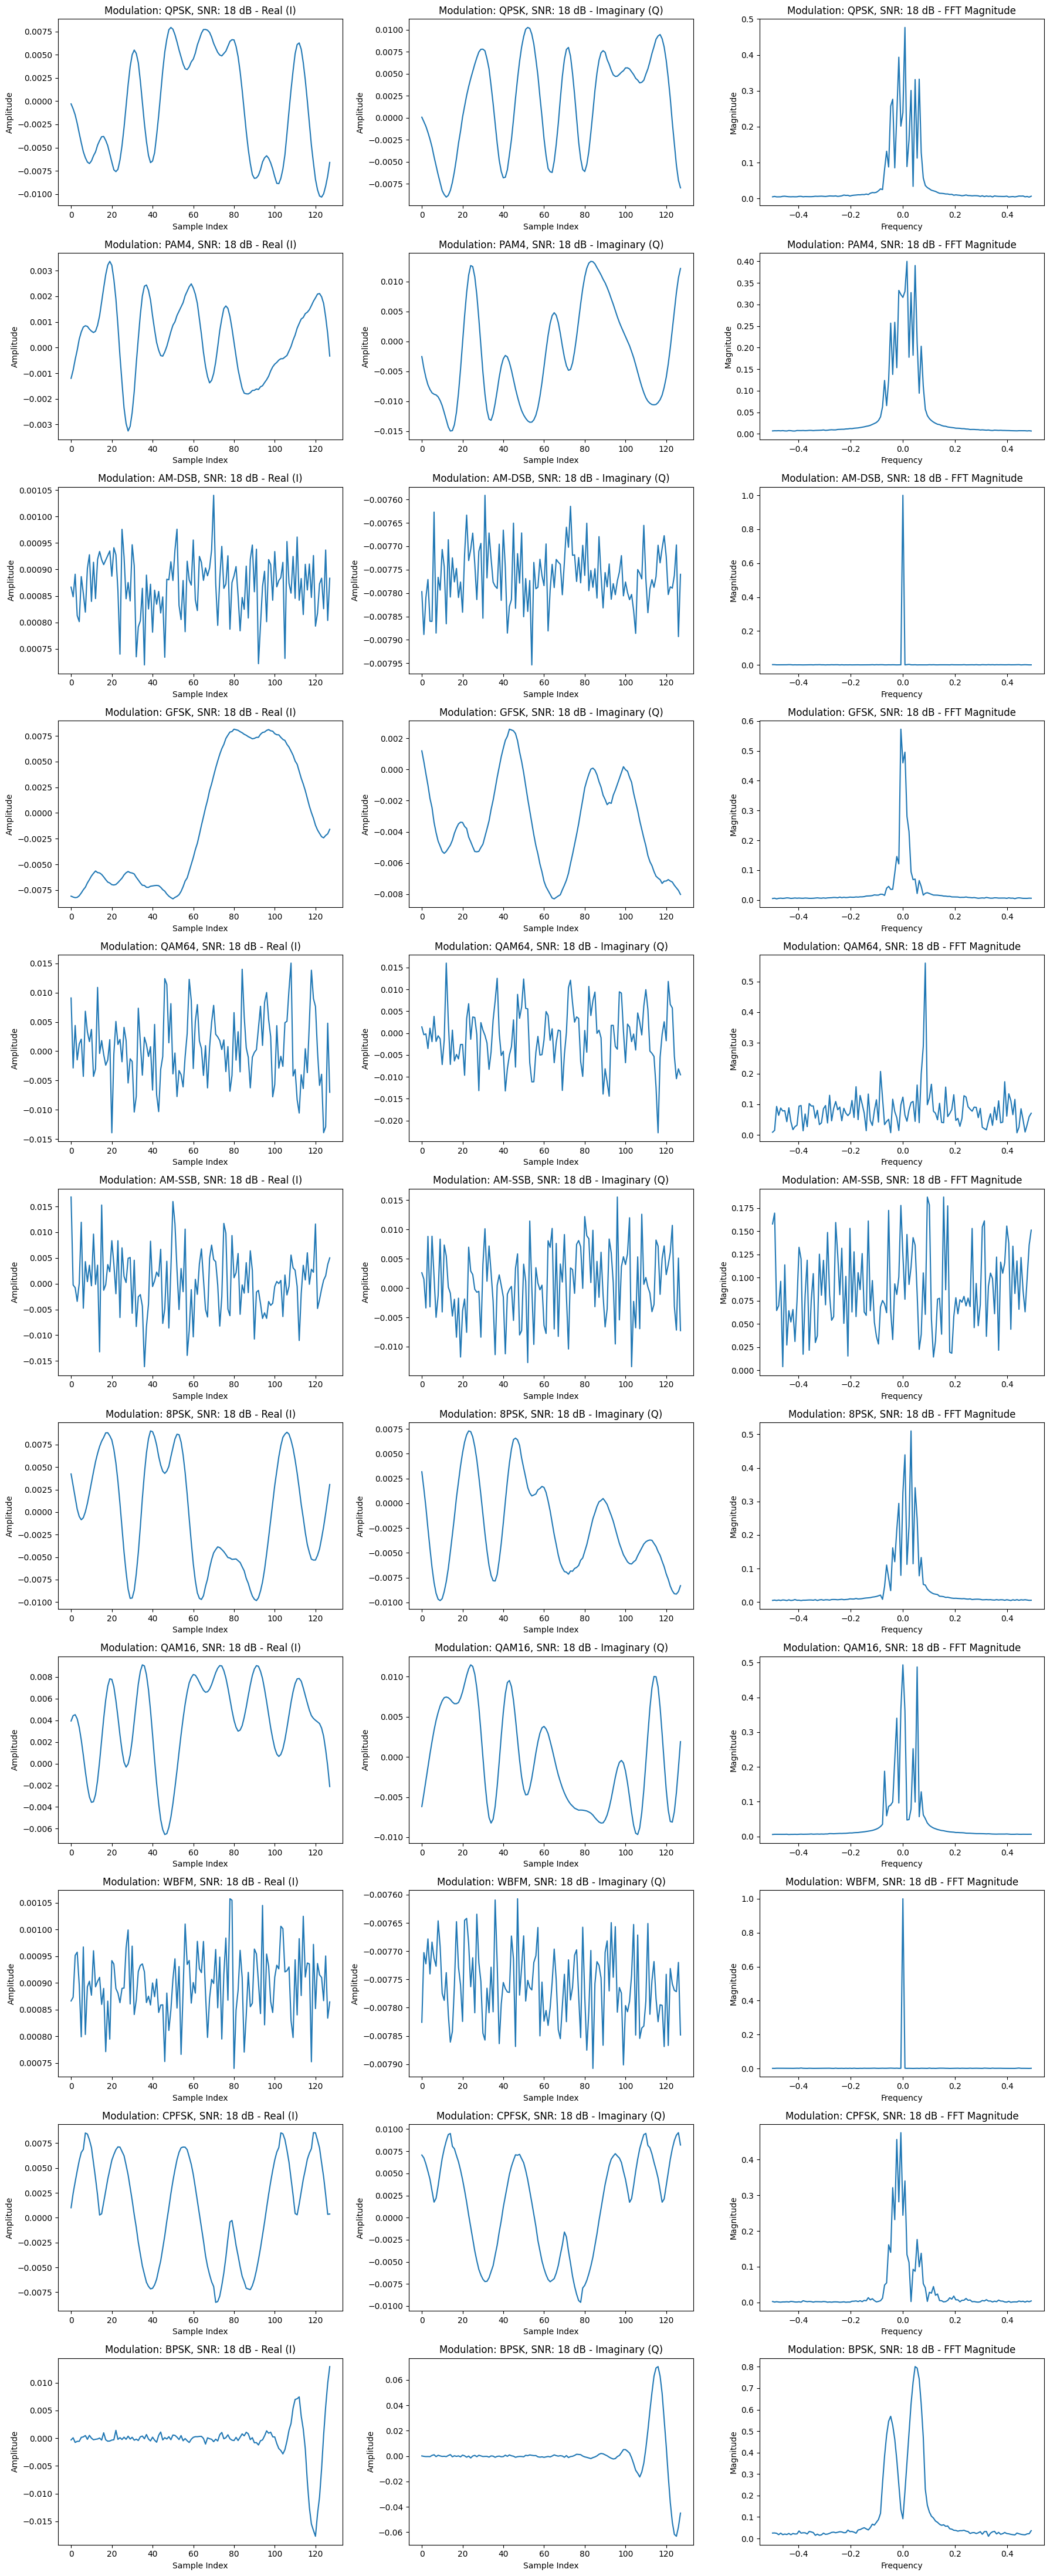

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Function to plot all highest SNR signals in one figure with separate subplots
def plot_all_highest_snr_signals(data):
    # Dictionary to store the highest SNR signal for each modulation type
    highest_snr_signals = {}

    # Find the highest SNR signal for each modulation type
    for key, signals in data.items():
        mod_type, snr = key
        if (
            mod_type not in highest_snr_signals
            or snr > highest_snr_signals[mod_type][1]
        ):
            highest_snr_signals[mod_type] = (
                signals[0],
                snr,
            )  # Store the signal and its SNR

    # Create a figure and add subplots for each modulation type
    num_modulations = len(highest_snr_signals)
    fig, axs = plt.subplots(num_modulations, 3, figsize=(18, 4 * num_modulations))

    # Plot each modulation type's highest SNR signal
    for i, (mod_type, (signal, snr)) in enumerate(highest_snr_signals.items()):
        real_part = signal[0]  # I-component (real)
        imag_part = signal[1]  # Q-component (imaginary)

        # Plot real (I) component
        axs[i, 0].plot(real_part)
        axs[i, 0].set_title(f"Modulation: {mod_type}, SNR: {snr} dB - Real (I)")
        axs[i, 0].set_xlabel("Sample Index")
        axs[i, 0].set_ylabel("Amplitude")

        # Plot imaginary (Q) component
        axs[i, 1].plot(imag_part)
        axs[i, 1].set_title(f"Modulation: {mod_type}, SNR: {snr} dB - Imaginary (Q)")
        axs[i, 1].set_xlabel("Sample Index")
        axs[i, 1].set_ylabel("Amplitude")

        # Compute and plot FFT of the combined I/Q signal
        complex_signal = real_part + 1j * imag_part  # Combine I and Q to form complex signal
        fft_result = np.fft.fftshift(np.fft.fft(complex_signal))  # Shift FFT for centered frequency plot
        fft_magnitude = np.abs(fft_result)  # Compute magnitude of FFT

        axs[i, 2].plot(np.fft.fftshift(np.fft.fftfreq(len(fft_magnitude))), fft_magnitude)
        axs[i, 2].set_title(f"Modulation: {mod_type}, SNR: {snr} dB - FFT Magnitude")
        axs[i, 2].set_xlabel("Frequency")
        axs[i, 2].set_ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

# Load the RML2016.10a_dict.pkl file with explicit encoding
with open("RML2016.10a_dict.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")  # Use 'latin1' encoding to avoid Unicode errors

# Print the modulation types and the shape of the data
for key, signals in data.items():
    mod_type, snr = key
    print(f"Modulation Type: {mod_type}, SNR: {snr}, Shape: {signals.shape}")

# Call the function to plot all highest SNR signals in one figure
plot_all_highest_snr_signals(data)


In [ ]:
# find the bandwidth of the FFT and plot it 
# Additional cell: Plot FFT of each signal and compute the bandwidth with markers
def plot_fft_with_bandwidth(data, threshold_ratio=0.5):
    highest_snr_signals = {}

    # Find the highest SNR signal for each modulation type
    for key, signals in data.items():
        mod_type, snr = key
        if mod_type not in highest_snr_signals or snr > highest_snr_signals[mod_type][1]:
            highest_snr_signals[mod_type] = (signals[0], snr)

    # Create a figure for FFT with bandwidth markers
    num_modulations = len(highest_snr_signals)
    fig, axs = plt.subplots(num_modulations, 1, figsize=(12, 3 * num_modulations))

    for i, (mod_type, (signal, snr)) in enumerate(highest_snr_signals.items()):
        real_part = signal[0]
        imag_part = signal[1]
        complex_signal = real_part + 1j * imag_part

        # Compute FFT and frequency axis
        fft_result = np.fft.fftshift(np.fft.fft(complex_signal))
        fft_magnitude = np.abs(fft_result)
        freqs = np.fft.fftshift(np.fft.fftfreq(len(fft_magnitude)))

        # Compute bandwidth based on threshold
        max_magnitude = np.max(fft_magnitude)
        threshold = threshold_ratio * max_magnitude
        bandwidth_indices = np.where(fft_magnitude >= threshold)[0]
        low_freq, high_freq = freqs[bandwidth_indices[0]], freqs[bandwidth_indices[-1]]
        bandwidth = high_freq - low_freq

        # Plot FFT magnitude with bandwidth markers
        axs[i].plot(freqs, fft_magnitude)
        axs[i].axvline(x=low_freq, color="red", linestyle="--", label=f"Low Freq: {low_freq:.2f}")
        axs[i].axvline(x=high_freq, color="green", linestyle="--", label=f"High Freq: {high_freq:.2f}")
        axs[i].set_title(f"Modulation: {mod_type}, SNR: {snr} dB - FFT with Bandwidth ({bandwidth:.2f} Hz)")
        axs[i].set_xlabel("Frequency")
        axs[i].set_ylabel("Magnitude")
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Plot FFT with bandwidth markers for each signal
plot_fft_with_bandwidth(data)
